<a href="https://colab.research.google.com/github/danadler-dev/MDPI-Article-2/blob/main/ABC_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import hashlib

def compact_symbols(symbol_dict):
    """
    Compacts the keys of a dictionary to make them more readable while retaining the counts.
    Symbols with repeating characters or subgroups are compacted.

    Args:
        symbol_dict (dict): A dictionary with symbols as keys and counts as values.

    Returns:
        dict: A new dictionary with compacted keys and the same counts.
    """
    def compact(symbol):
        # Compact repeated characters (e.g., "AAA" -> "A3")
        compacted = ""
        count = 1
        for i in range(1, len(symbol)):
            if symbol[i] == symbol[i - 1]:
                count += 1
            else:
                compacted += f"{symbol[i - 1]}{count if count > 1 else ''}"
                count = 1
        compacted += f"{symbol[-1]}{count if count > 1 else ''}"

        # Compact repeated substrings (e.g., "ABABAB" -> "(AB)3")
        def compact_subgroups(s, max_passes=2):
            pattern = re.compile(r"(.+?)\1{1,}")  # Match repeated substrings
            passes = 0
            while passes < max_passes:
                match = pattern.search(s)
                if not match:
                    break
                repeated, repeats = match.group(1), len(match.group(0)) // len(match.group(1))
                s = s.replace(match.group(0), f"({repeated}){repeats}")
                passes += 1
            return s

        compacted = compact_subgroups(compacted)
        return compacted

    def shorten_symbol(symbol, max_length=15):
        """
        Shortens a symbol using a hash if its length exceeds max_length.
        """
        if len(symbol) > max_length:
            # Use a hash-based identifier
            short_hash = hashlib.md5(symbol.encode()).hexdigest()[:6]  # First 6 hex digits
            return f"H{short_hash}"
        return symbol

    # Compact and shorten symbols
    compacted_dict = {}
    for symbol, count in symbol_dict.items():
        compacted = compact(symbol)
        compacted = shorten_symbol(compacted)
        compacted_dict[compacted] = count

    return compacted_dict

Unconstrained System:


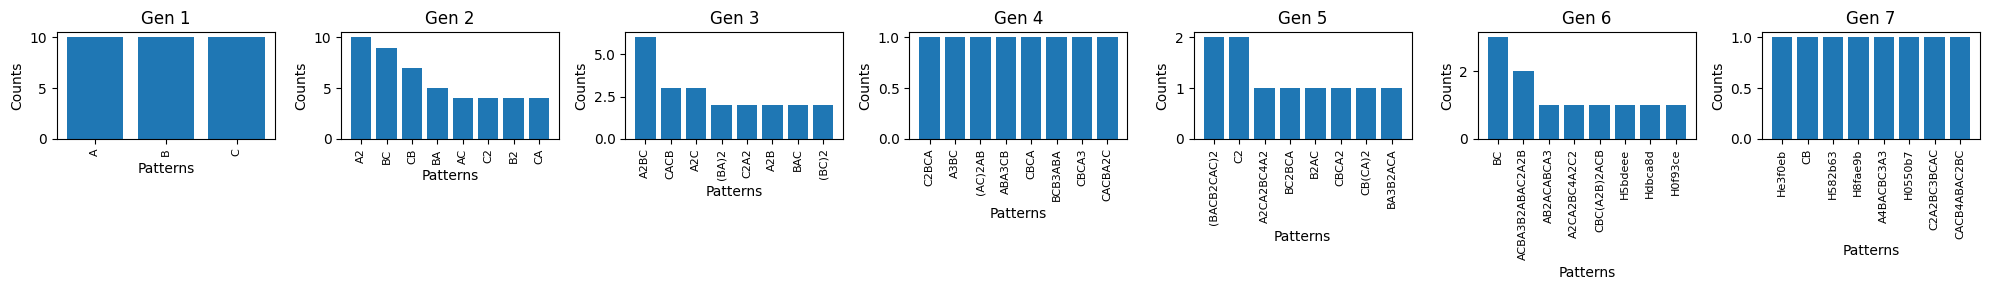

ABC System:


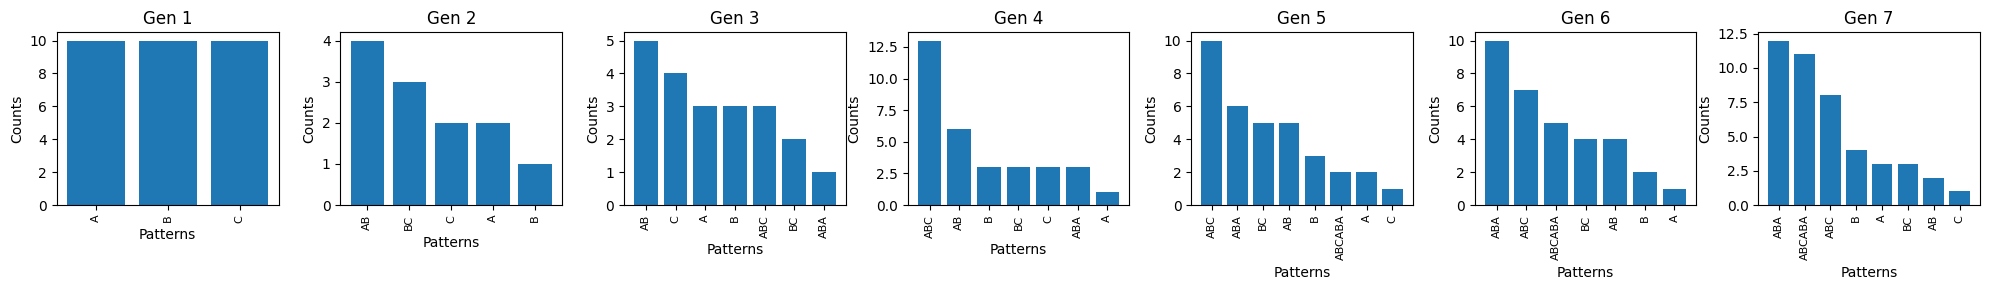


Final Results:
Unconstrained System: {'BBACBACBBCACBACBBCACCAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CACBAAABBABACCAABBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'ABBBAABACCCAAABAABACBABBACABCAAA': 1, 'BCBCCCAAAABCCACBBCBBBABABACAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CABAABACBABBCAABAABACB': 1, 'CCCABABAAAABAABCBCBCBABAAACB': 1, 'AA': 2, 'BBCAABAABACBAAABACBCCCAAABAABACBCCABABAAAABAABCBCBCBABAAACB': 1, 'AAAABACBCCCAAAC': 2, 'CAABCCCBCAAACAABCCCCAABACABCAACCBCBCCBCAA': 1, 'BACBAAABBABACCAABABAABACBABC': 1, 'CCABABAAAABAABCBCBCBABAAACBA': 1, 'BBBAABACCCAAABAABACBABBACABCAAACACBAAABBABACCAAB': 1, 'CCAABCCCBCACA': 1, 'BA': 1, 'CACBBBBABACCBCBBCAABAABACBAAABACBCCCAAABAABACB': 1, 'BBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'AAAABACBCCCAABCAABAABACBCACBBBBABACCABABAAAABAABCBCBCBABAAACB': 1, 'BBCBCAABABABBCBABAACCCACBAAABABBAC': 1, 'BBBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'BBBAABACCCAAABAABACBBACBBCACBABABBCAABCCACBAC': 1, 'CCACBBBBABACCB': 1, 'BBCCC

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_case(num_generations, interactions_per_generation, regeneration_rate, initial_population, stability=None):
    """
    Simulate a system with interactions and optional stability rules.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.
        stability (dict): Stability values for compounds (optional).

    Returns:
        dict: Final population counts for the last generation.
    """
    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations, figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
        # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(8)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        labels = compact_symbols(dict(top_patterns)).keys()
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation + 1}")
        ax.set_xlabel("Patterns")
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=90, fontsize=8)
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
#           symbol1, symbol2 = random.sample(population, 2)
            symbol1, symbol2 = random.choices(population, k=2)
            compound = "".join(symbol1 + symbol2)
            if stability is None or compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if stability is None or random.random() < (stability.get(compound, 1) / max(stability.values())):
                aged_population.append(compound)
        population = aged_population

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

    # Return the final population counts
    return dict(Counter(population))


# Parameters for the simulations
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}
initial_population = ["A", "B", "C"] * 10

# Stability values for the ABC system
abc_stability = {
    "AB": 3, "BC": 3, "ABC": 5, "ABA": 6, "ABCABA":8,  # High stability for specific compounds
    "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
}

# Run the unconstrained simulation (no stability rules)
print("Unconstrained System:")
unrestricted_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population
)

# Run the ABC system simulation (with stability rules)
print("ABC System:")
stability_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population, abc_stability
)

# Print final results
print("\nFinal Results:")
print("Unconstrained System:", unrestricted_results)
print("ABC System:", stability_results)


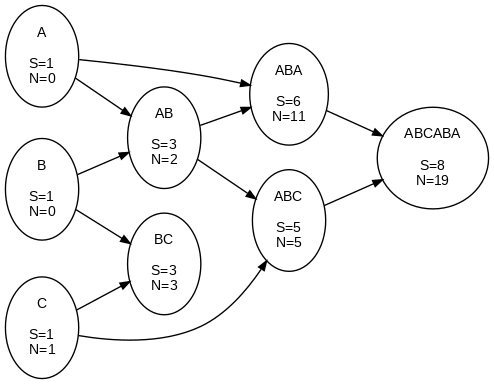

In [ ]:
# Write the graph definition to a DOT file
dot_content = """
digraph ABC_System {
    rankdir=LR;
    size="6,4!";
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial"];
    edge [color=black, arrowsize=0.7];

    // Base elements to intermediate patterns
    A [label="A\n\nS=1\nN=0"];
    B [label="B\n\nS=1\nN=0"];
    C [label="C\n\nS=1\nN=1"];
    AB [label="AB\n\nS=3\nN=2"];
    BC [label="BC\n\nS=3\nN=3"];
    ABC [label="ABC\n\nS=5\nN=5"];
    ABA [label="ABA\n\nS=6\nN=11"];
    ABCABA [label="ABCABA\n\nS=8\nN=19"];

    // Intermediates to final patterns
    A -> AB;
    B -> AB;
    B -> BC;
    C -> BC;

    // Intermediate patterns to final patterns
    AB -> ABC;
    C -> ABC;
    AB -> ABA;
    A -> ABA;
    ABA -> ABCABA;
    ABC -> ABCABA;
}
"""

# Write the DOT content to a file
with open("abc_system.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_system.dot > abc_system.png

# Display the rendered image
from IPython.display import Image
Image('abc_system.png')


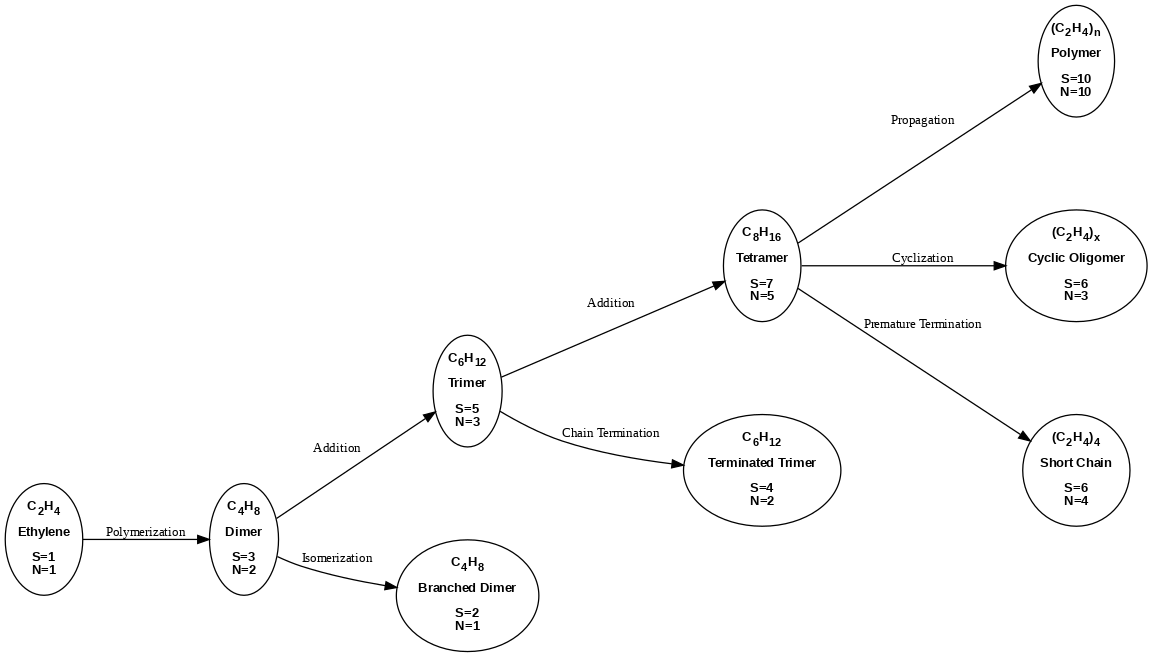

In [ ]:
dot_content = """
digraph Polymerization_Evolution {
    rankdir=LR;
    size="12,7!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial Bold", margin=0.01];
    edge [color=black, arrowsize=0.9, fontsize=10];

    // Base elements and intermediates
    Ethylene [label=<C<sub>2</sub>H<sub>4</sub><br/><br/>Ethylene<br/><br/>S=1<br/>N=1>];
    Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Dimer<br/><br/>S=3<br/>N=2>];
    Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Trimer<br/><br/>S=5<br/>N=3>];
    Tetramer [label=<C<sub>8</sub>H<sub>16</sub><br/><br/>Tetramer<br/><br/>S=7<br/>N=5>];
    Polymer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>n</sub><br/><br/>Polymer<br/><br/>S=10<br/>N=10>];

    // Less stable by-products
    Branched_Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Branched Dimer<br/><br/>S=2<br/>N=1>];
    Terminated_Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Terminated Trimer<br/><br/>S=4<br/>N=2>];
    Cyclic_Oligomer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>x</sub><br/><br/>Cyclic Oligomer<br/><br/>S=6<br/>N=3>];
    Short_Chain [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>4</sub><br/><br/>Short Chain<br/><br/>S=6<br/>N=4>];

    // Main reaction pathway
    Ethylene -> Dimer [label="Polymerization"];
    Dimer -> Trimer [label="Addition"];
    Trimer -> Tetramer [label="Addition"];
    Tetramer -> Polymer [label="Propagation"];

    // Less stable reaction pathways
    Dimer -> Branched_Dimer [label="Isomerization"];
    Trimer -> Terminated_Trimer [label="Chain Termination"];
    Tetramer -> Cyclic_Oligomer [label="Cyclization"];
    Tetramer -> Short_Chain [label="Premature Termination"];
}

"""

# Write the DOT content to a file
with open("abc_poly.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_poly.dot > abc_poly.png

# Display the rendered image
from IPython.display import Image
Image('abc_poly.png')



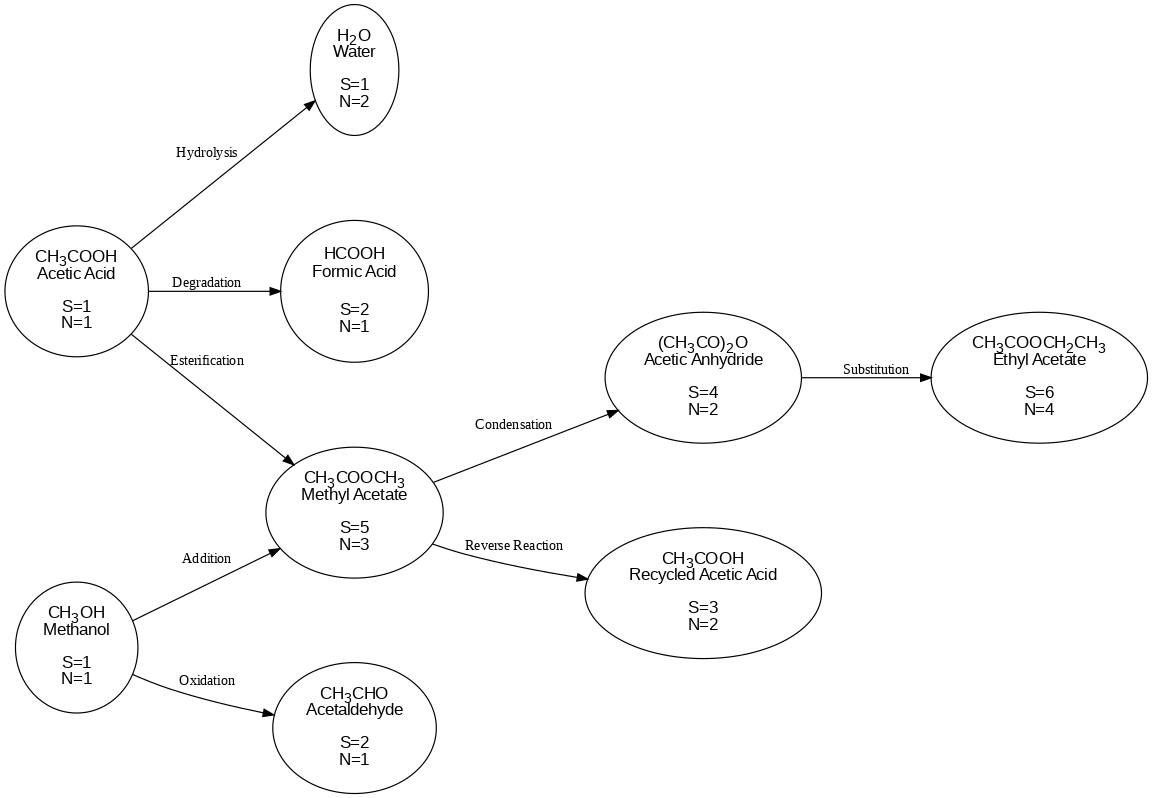

In [3]:
dot_content = """
digraph Esterification_Hydrolysis {
    rankdir=LR;
    size="12,10!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base molecules and intermediates
    Acetic_Acid [label=<CH<sub>3</sub>COOH<br/>Acetic Acid<br/><br/>S=1<br/>N=1>];
    Methanol [label=<CH<sub>3</sub>OH<br/>Methanol<br/><br/>S=1<br/>N=1>];
    Methyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>3</sub><br/>Methyl Acetate<br/><br/>S=5<br/>N=3>];
    Acetic_Anhydride [label=<(CH<sub>3</sub>CO)<sub>2</sub>O<br/>Acetic Anhydride<br/><br/>S=4<br/>N=2>];
    Ethyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>2</sub>CH<sub>3</sub><br/>Ethyl Acetate<br/><br/>S=6<br/>N=4>];

    // By-products
    Water [label=<H<sub>2</sub>O<br/>Water<br/><br/>S=1<br/>N=2>];
    Formic_Acid [label=<HCOOH<br/>Formic Acid<br/><br/>S=2<br/>N=1>];
    Acetaldehyde [label=<CH<sub>3</sub>CHO<br/>Acetaldehyde<br/><br/>S=2<br/>N=1>];
    Acetic_Acid_Regen [label=<CH<sub>3</sub>COOH<br/>Recycled Acetic Acid<br/><br/>S=3<br/>N=2>];

    // Main reaction pathway
    Acetic_Acid -> Methyl_Acetate [label="Esterification"];
    Methanol -> Methyl_Acetate [label="Addition"];
    Methyl_Acetate -> Acetic_Anhydride [label="Condensation"];
    Acetic_Anhydride -> Ethyl_Acetate [label="Substitution"];

    // Side reactions
    Acetic_Acid -> Water [label="Hydrolysis"];
    Acetic_Acid -> Formic_Acid [label="Degradation"];
    Methanol -> Acetaldehyde [label="Oxidation"];
    Methyl_Acetate -> Acetic_Acid_Regen [label="Reverse Reaction"];
}


"""

# Write the DOT content to a file
with open("abc_hydro.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_hydro.dot > abc_hydro.png

# Display the rendered image
from IPython.display import Image
Image('abc_hydro.png')


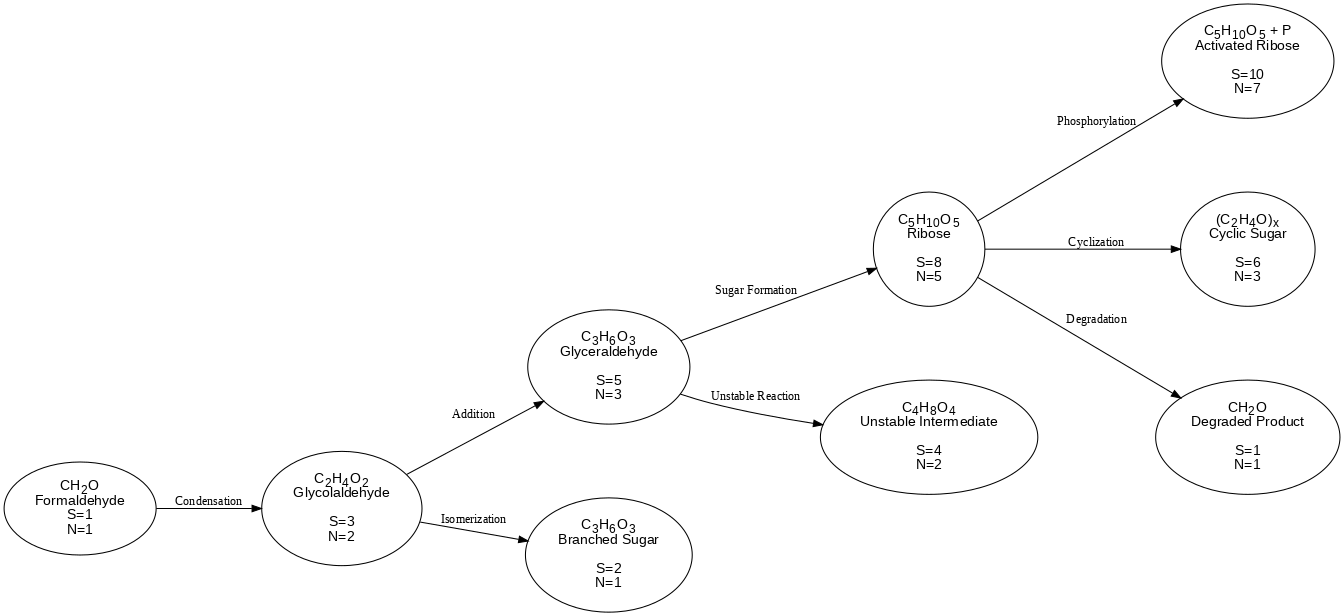

In [5]:
dot_content = """
digraph RNA_Precursor_Evolution {
    rankdir=LR;
    size="14,10!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base molecules and intermediates
    Formaldehyde [label=<CH<sub>2</sub>O<br/>Formaldehyde<br/>S=1<br/>N=1>];
    Glycolaldehyde [label=<C<sub>2</sub>H<sub>4</sub>O<sub>2</sub><br/>Glycolaldehyde<br/><br/>S=3<br/>N=2>];
    Glyceraldehyde [label=<C<sub>3</sub>H<sub>6</sub>O<sub>3</sub><br/>Glyceraldehyde<br/><br/>S=5<br/>N=3>];
    Ribose [label=<C<sub>5</sub>H<sub>10</sub>O<sub>5</sub><br/>Ribose<br/><br/>S=8<br/>N=5>];
    Activated_Ribose [label=<C<sub>5</sub>H<sub>10</sub>O<sub>5</sub> + P<br/>Activated Ribose<br/><br/>S=10<br/>N=7>];

    // Less stable by-products
    Branched_Sugar [label=<C<sub>3</sub>H<sub>6</sub>O<sub>3</sub><br/>Branched Sugar<br/><br/>S=2<br/>N=1>];
    Intermediate_A [label=<C<sub>4</sub>H<sub>8</sub>O<sub>4</sub><br/>Unstable Intermediate<br/><br/>S=4<br/>N=2>];
    Cyclic_Intermediate [label=<(C<sub>2</sub>H<sub>4</sub>O)<sub>x</sub><br/>Cyclic Sugar<br/><br/>S=6<br/>N=3>];
    Degraded_Product [label=<CH<sub>2</sub>O<br/>Degraded Product<br/><br/>S=1<br/>N=1>];

    // Main reaction pathway
    Formaldehyde -> Glycolaldehyde [label="Condensation"];
    Glycolaldehyde -> Glyceraldehyde [label="Addition"];
    Glyceraldehyde -> Ribose [label="Sugar Formation"];
    Ribose -> Activated_Ribose [label="Phosphorylation"];

    // Less stable reaction pathways
    Glycolaldehyde -> Branched_Sugar [label="Isomerization"];
    Glyceraldehyde -> Intermediate_A [label="Unstable Reaction"];
    Ribose -> Cyclic_Intermediate [label="Cyclization"];
    Ribose -> Degraded_Product [label="Degradation"];
}


"""

# Write the DOT content to a file
with open("abc_prerna.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_prerna.dot > abc_prerna.png

# Display the rendered image
from IPython.display import Image
Image('abc_prerna.png')


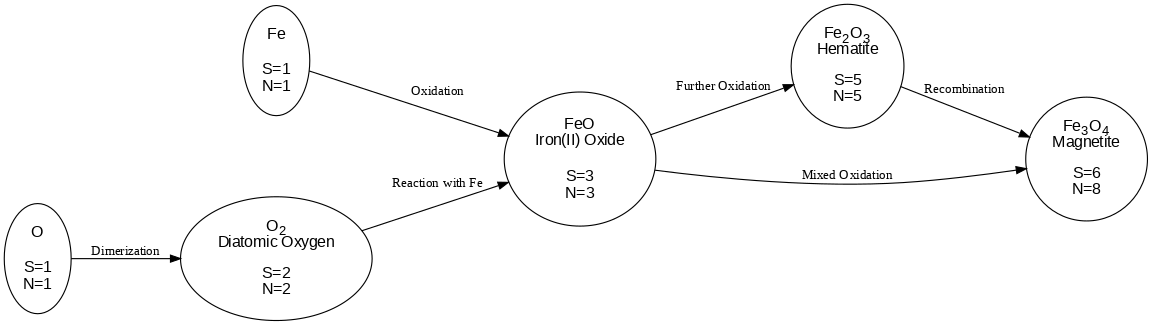

In [11]:
dot_content = """
digraph Iron_Oxide_Evolution {
    rankdir=LR;
    size="12,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements
    Fe [label=<Fe<br/><br/>S=1<br/>N=1>];
    O [label=<O<br/><br/>S=1<br/>N=1>];

    // Intermediates
    O2 [label=<O<sub>2</sub><br/>Diatomic Oxygen<br/><br/>S=2<br/>N=2>];
    FeO [label=<FeO<br/>Iron(II) Oxide<br/><br/>S=3<br/>N=3>];
    Fe2O3 [label=<Fe<sub>2</sub>O<sub>3</sub><br/>Hematite<br/><br/>S=5<br/>N=5>];
    Fe3O4 [label=<Fe<sub>3</sub>O<sub>4</sub><br/>Magnetite<br/><br/>S=6<br/>N=8>];

    // Base reactions
    Fe -> FeO [label="Oxidation"];
    O -> O2 [label="Dimerization"];

    // Intermediate reactions
    O2 -> FeO [label="Reaction with Fe"];
    FeO -> Fe2O3 [label="Further Oxidation"];
    FeO -> Fe3O4 [label="Mixed Oxidation"];

    // Final pathways
    Fe2O3 -> Fe3O4 [label="Recombination"];
}



"""

# Write the DOT content to a file
with open("abc_oxi.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_oxi.dot > abc_oxi.png

# Display the rendered image
from IPython.display import Image
Image('abc_oxi.png')
